Import libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Используя параметры pandas красиво прочитать файл 
df = pd.read_csv('UCI_Credit_Card.csv', sep=',')
df.head().loc[:, 'ID':'AGE']

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,1,20000.0,2,2,1,24
1,2,120000.0,2,2,2,26
2,3,90000.0,2,2,2,34
3,4,50000.0,2,2,1,37
4,5,50000.0,1,2,1,57


In [3]:
for item in df.columns[:]:
    print(item)

ID
LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_0
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6
default.payment.next.month


In [ ]:
# Выведите типы переменных
print('Data types:')
print(df.dtypes[:10])

In [4]:
# Выведите число пропусков

In [5]:
print('\nNumber of nulls:')
df.isnull().sum()[:10]


Number of nulls:


ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
dtype: int64

In [7]:
# Для численных значений посчитайте пару статистик

print('Age median:', int(df['AGE'].median()))
print('Age minimum:', int(df['AGE'].min()))
print('Age maximum:', int(df['AGE'].max()))

Age median: 34
Age minimum: 21
Age maximum: 79


In [8]:
df['MARRIAGE'].describe()

count    30000.000000
mean         1.551867
std          0.521970
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64

In [10]:
# Посчитать число женщин с университетским образованием
print('Well educated girls:', len(set(df[(df['SEX']==2) & (df['EDUCATION']==2)]['ID'])))

Well educated girls: 8656


In [11]:
filter_col = [i for i in list(df.columns) if (i.startswith('BILL_') | i.startswith('PAY_'))]
filter_col.append('default.payment.next.month')

In [12]:
# Сгрупировать по 'default payment next month' и посчитать медиану для показателей начинающихся на BILL_ и PAY_
df[filter_col].groupby('default.payment.next.month').median()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1,0,0,0,0,0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [13]:
# Постройте pivot table по SEX, EDUCATION, MARRIAGE
df.pivot_table('MARRIAGE', 'SEX', 'EDUCATION',  aggfunc='count')

EDUCATION,0,1,2,3,4,5,6
SEX,,,,,,,
1,8,4354,5374,1990,42,95,25
2,6,6231,8656,2927,81,185,26


In [ ]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

def limit_bal(x):
    
    if x<=10000:
        return 'A'
    elif x<=100000 and x>10000:
        return 'B'
    elif x<=200000 and x>100000:
        return 'C'
    elif x<=400000 and x>200000:
        return 'D'
    elif x<=700000 and x>400000:  
        return 'E'
    else:
        return 'F'
    
df['limit'] = df['LIMIT_BAL'].map(limit_bal)    

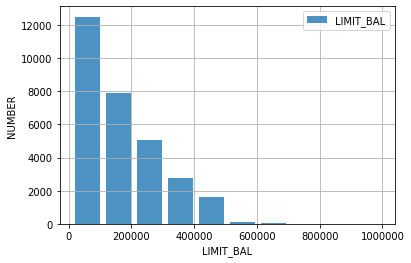

In [30]:
# Построить распределение LIMIT_BAL
df[['LIMIT_BAL']].plot.hist(bins = 10, rwidth = 0.8, alpha = 0.8)

plt.xlabel('LIMIT_BAL')
plt.ylabel('NUMBER')

plt.grid()
plt.show()

In [ ]:
# Построить зависимость кредитного лимита и образования для каждого из полов

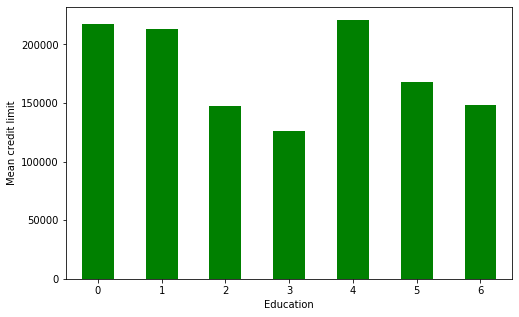

In [38]:
_, ax = plt.subplots(figsize=(8,5))

df_male_female = df[['EDUCATION', 'LIMIT_BAL']].groupby('EDUCATION').mean().sort_values('EDUCATION')['LIMIT_BAL']
df_male_female.plot(kind='bar', color='green')

plt.xlabel('Education')
plt.ylabel('Mean credit limit')
plt.xticks(rotation='horizontal')

plt.show()

In [35]:
df.pivot_table('LIMIT_BAL', 'SEX', 'EDUCATION',  aggfunc='mean')

EDUCATION,0,1,2,3,4,5,6
SEX,,,,,,,
1,212500.000000,219251.263206,133902.121325,120943.557789,197142.857143,159221.052632,157200.000000
2,223333.333333,208557.213930,155232.902033,130362.145542,233209.876543,172756.756757,139615.384615


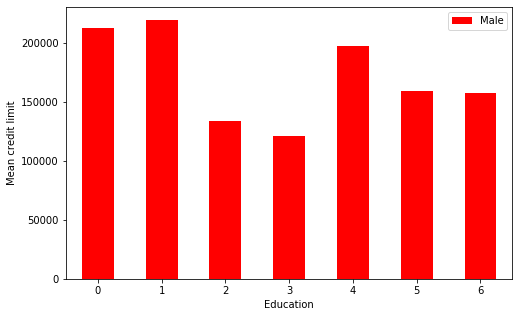

In [36]:
# Построить зависимость кредитного лимита и образования только для одного из полов
_, ax = plt.subplots(figsize=(8,5))

df_male = df[df['SEX']==1][['EDUCATION', 'LIMIT_BAL']].groupby('EDUCATION').mean().sort_values('EDUCATION')['LIMIT_BAL']
df_male.plot(kind='bar', color='red', label='Male')

plt.xlabel('Education')
plt.ylabel('Mean credit limit')

plt.xticks(rotation='horizontal')
plt.legend()

plt.show()

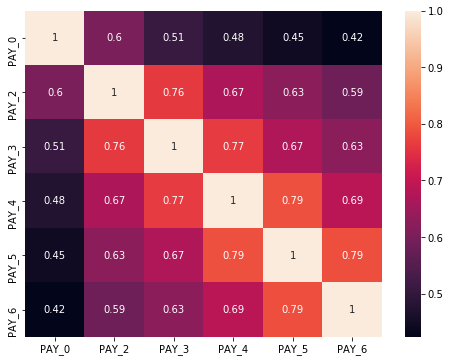

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].corr('kendall'), annot=True);

# PAY_0 
# PAY_2 

In [ ]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)

sns.pairplot(df[['LIMIT_BAL', 'EDUCATION', 'default.payment.next.month']])

Построим коррелляции платежей:

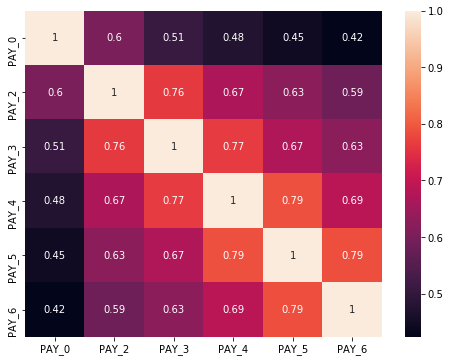

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].corr('kendall'), annot=True)
plt.show()

Высокая коррелляция между вторым платежом и остальными. Можем оставить PAY_6 в качестве признака, т.к. его наличие отражает всю цепочку оплаты. Еще лучше ситуация с признаками BILL_AMT - можем понизить размерность, оставив один из признаков:  

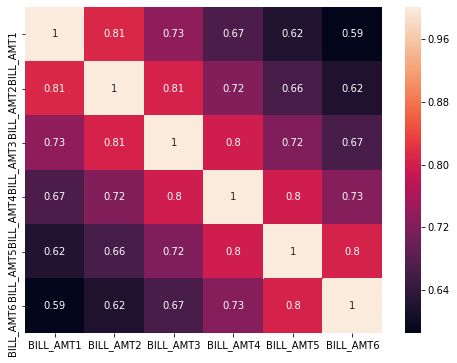

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].corr('kendall'), annot=True)
plt.show()

Похуже ситуация с PAY_AMT, но также есть слабая коррелляция:

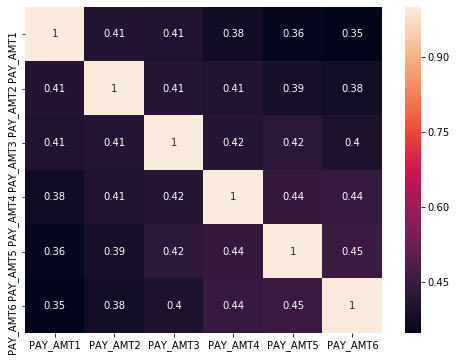

In [63]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].corr('kendall'), annot=True)
plt.show()

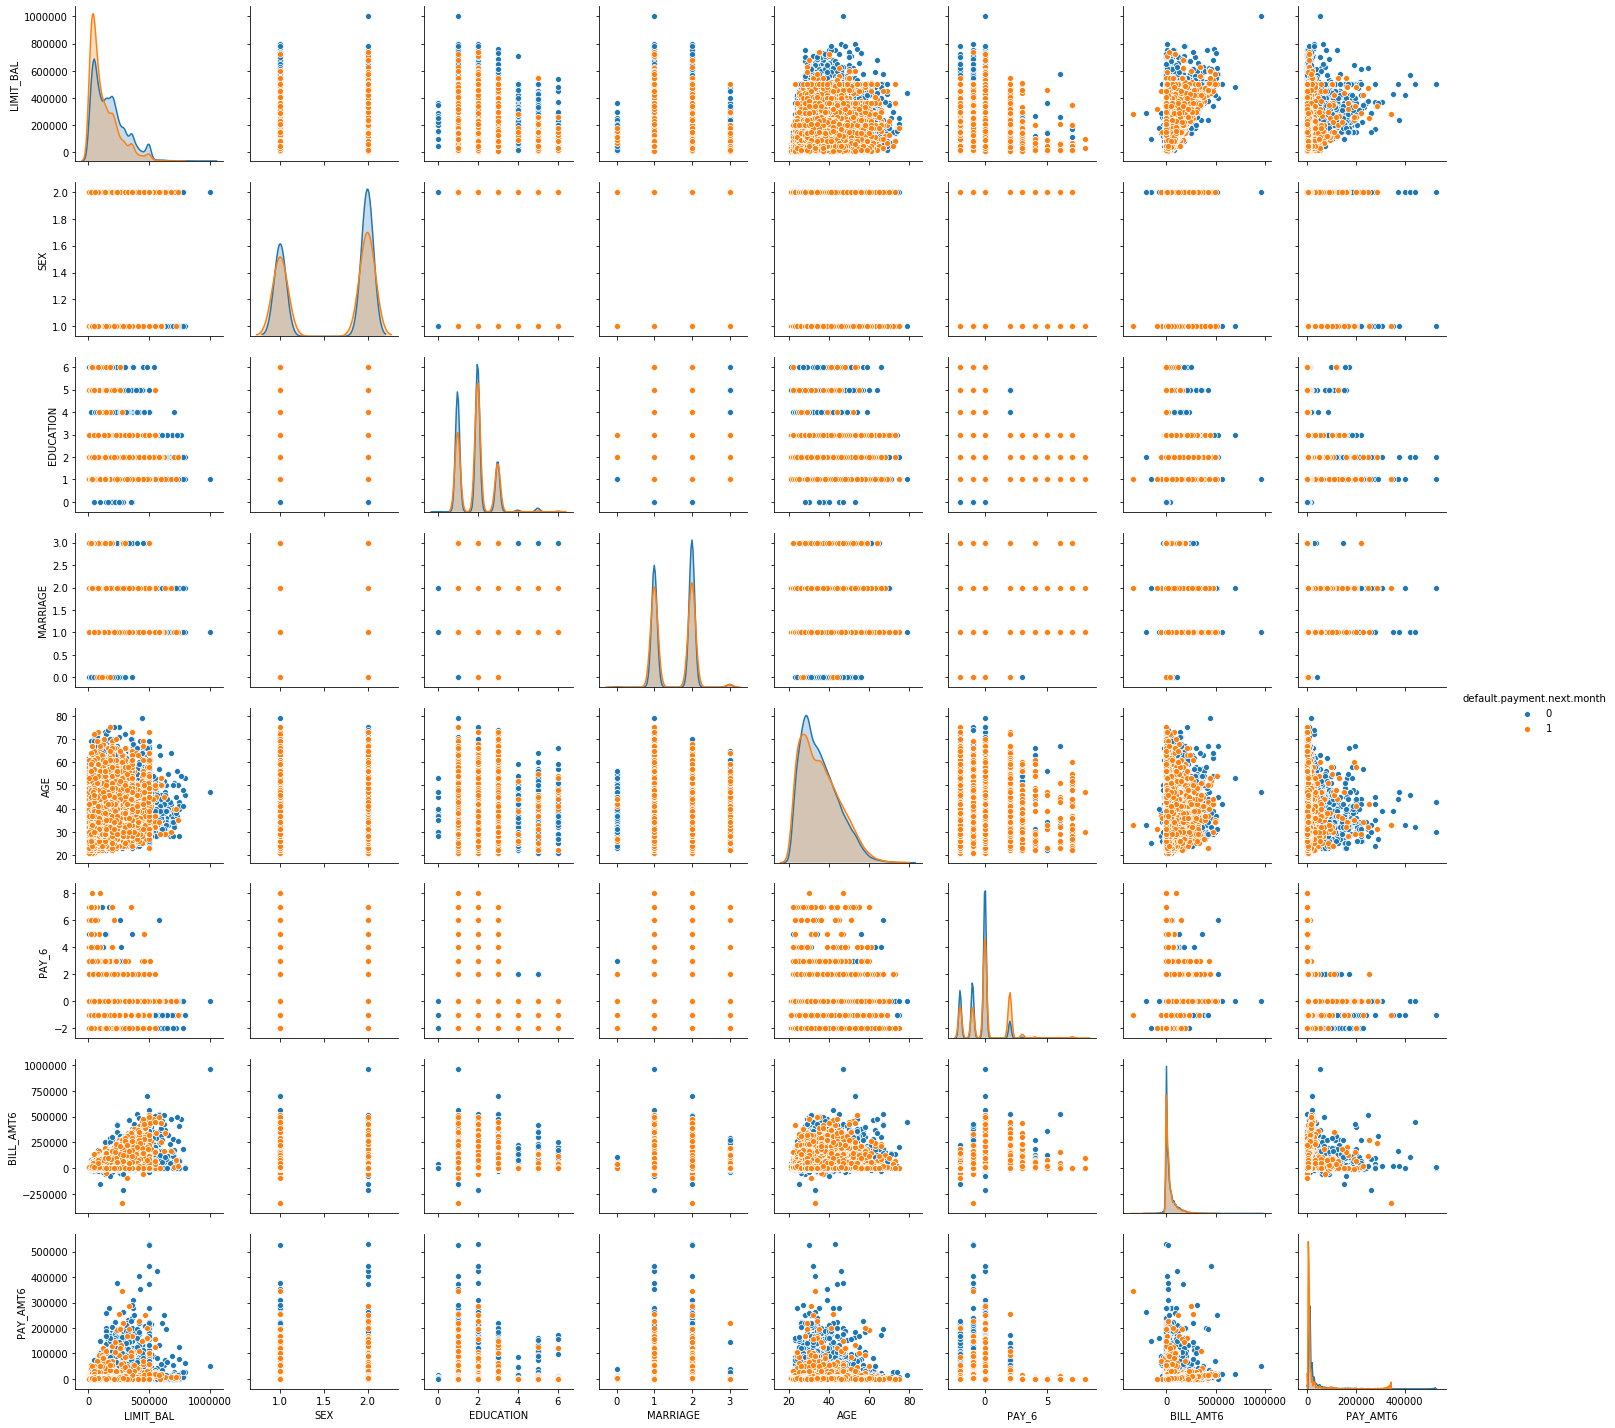

In [68]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_6', 'BILL_AMT6', 'PAY_AMT6']
sns.pairplot(df, vars=features, hue='default.payment.next.month')
plt.show()